In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
emc = pd.read_csv('emc_noiso.dat')
KP = pd.read_csv('KP_super.csv')
f2r_tong = pd.read_csv('f2v.csv')
f2r_mike = pd.read_csv('mnycz_f2r.csv')

In [3]:
c = np.polyfit(KP['x'],KP['R'],7)
def KP_fit(x):
    return np.polyval(c,x)

In [4]:
norm = 1.025
norms = '2_5'
normss = '2.5'

emc.ratio = emc.ratio.apply(lambda x: x*norm)
emc.error = emc.error.apply(lambda x: x*norm)

#Calculate F2n/F2p from the Helium-3 EMC Ratio
emc['f2r'] = (emc['ratio'] - (2 * KP_fit(emc['x']))) / (KP_fit(emc['x']) - emc['ratio'])

#Calculate the uncertainty of this extraction
#Uncertainty from the Helium-3 EMC Ratio
emc['f2r_error'] = emc.error * (KP_fit(emc.x) / ((KP_fit(emc.x) - emc.ratio)**2))

f2r = emc.query('x>=0.255 & x<=0.345')

#Uncertainty from the KP model of the Super Ratio
#I only have the uncertainty from a select number of points, so this will be applied manually
f2r.loc[2].f2r_error = ((f2r.loc[2].f2r_error)**2 + (((0.0024 * KP_fit(f2r.loc[2].x))**2) * ((f2r.loc[2].ratio/((KP_fit(f2r.loc[2].x) - f2r.loc[2].ratio)**2))**2)))**(1./2.)
f2r.loc[3].f2r_error = ((f2r.loc[3].f2r_error)**2 + (((0.0028 * KP_fit(f2r.loc[3].x))**2) * ((f2r.loc[3].ratio/((KP_fit(f2r.loc[3].x) - f2r.loc[3].ratio)**2))**2)))**(1./2.)
f2r.loc[4].f2r_error = ((f2r.loc[4].f2r_error)**2 + (((0.0033 * KP_fit(f2r.loc[4].x))**2) * ((f2r.loc[4].ratio/((KP_fit(f2r.loc[4].x) - f2r.loc[4].ratio)**2))**2)))**(1./2.)
f2r.loc[5].f2r_error = ((f2r.loc[5].f2r_error)**2 + (((0.0036 * KP_fit(f2r.loc[5].x))**2) * ((f2r.loc[5].ratio/((KP_fit(f2r.loc[5].x) - f2r.loc[5].ratio)**2))**2)))**(1./2.)

f2r_a3 = f2r_tong.query('x>=0.255 & x<=0.345')
f2r_h3 = f2r_mike.query('Bin_Center>=0.255 & Bin_Center<=0.345')

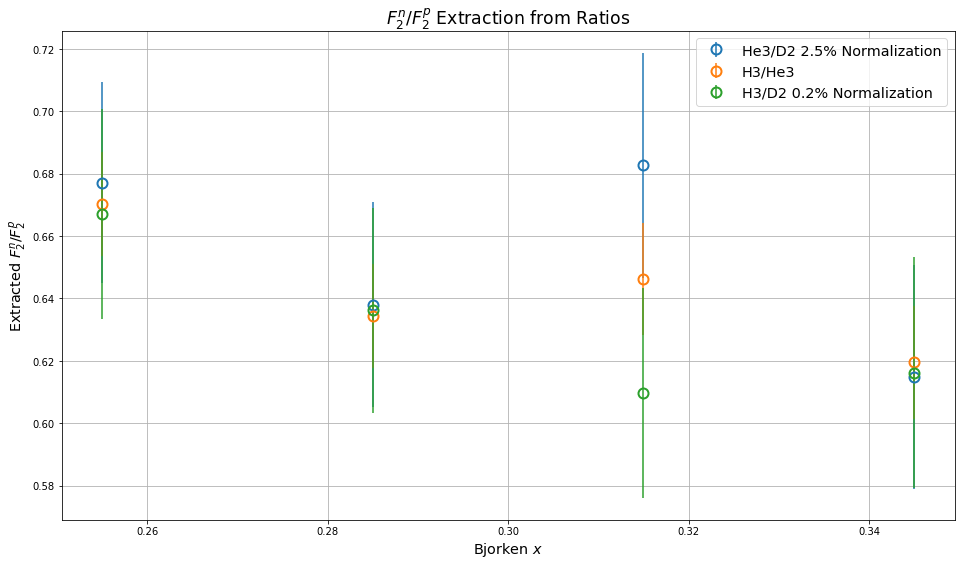

In [5]:
plt.figure(figsize=(16,9))
plt.errorbar(f2r.x,f2r.f2r,f2r.f2r_error,fmt='o',fillstyle='none',label='He3/D2 ' + normss + '% Normalization',ms=10,mew=2)
plt.errorbar(f2r_a3.x,f2r_a3.f2r,f2r_a3.f2r_error,fmt='o',fillstyle='none',label='H3/He3',ms=10,mew=2)
plt.errorbar(f2r_h3.Bin_Center,f2r_h3.Normalized_F2n_F2p_2,f2r_h3.All_Error,fmt='o',fillstyle='none',label='H3/D2 0.2% Normalization',ms=10,mew=2)
plt.legend(fontsize='x-large')
plt.grid()
plt.title('$F_2^n/F_2^p$ Extraction from Ratios',fontsize='xx-large')
plt.xlabel('Bjorken $x$',fontsize='x-large')
plt.ylabel('Extracted $F_2^n/F_2^p$',fontsize='x-large')
plt.savefig('all_f2n_f2p_norm' + norms + '.jpg')